## Week_4  Project

# Student Performance Analysis

### Import the libraries and load the data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"../Datasets/Student_data.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,student_id,gender,study_hours,attendance_percentage,math_marks,science_marks,english_marks
0,1,M,3.5,78,65,70,68
1,2,F,5.0,85,72,75,80
2,3,M,2.0,60,55,58,52
3,4,F,6.5,92,88,85,90
4,5,M,4.0,80,70,72,74
...,...,...,...,...,...,...,...
95,96,F,3.3,74,66,68,67
96,97,M,5.1,86,80,82,81
97,98,F,2.2,62,55,57,56
98,99,M,6.9,97,93,95,94


### Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             100 non-null    int64  
 1   gender                 100 non-null    object 
 2   study_hours            100 non-null    float64
 3   attendance_percentage  100 non-null    int64  
 4   math_marks             100 non-null    int64  
 5   science_marks          100 non-null    int64  
 6   english_marks          100 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.6+ KB


In [6]:
df.shape

(100, 7)

In [7]:
df.columns

Index(['student_id', 'gender', 'study_hours', 'attendance_percentage',
       'math_marks', 'science_marks', 'english_marks'],
      dtype='object')

In [8]:
df.head()

,student_id,gender,study_hours,attendance_percentage,math_marks,science_marks,english_marks
0,1,M,3.5,78,65,70,68
1,2,F,5.0,85,72,75,80
2,3,M,2.0,60,55,58,52
3,4,F,6.5,92,88,85,90
4,5,M,4.0,80,70,72,74


In [9]:
df.tail()

,student_id,gender,study_hours,attendance_percentage,math_marks,science_marks,english_marks
95,96,F,3.3,74,66,68,67
96,97,M,5.1,86,80,82,81
97,98,F,2.2,62,55,57,56
98,99,M,6.9,97,93,95,94
99,100,F,5.1,84,78,80,82


In [10]:
df.describe()

,student_id,study_hours,attendance_percentage,math_marks,science_marks,english_marks
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,50.500000,4.468000,80.240000,73.620000,75.55000,74.860000
std,29.011492,1.468723,10.607906,11.717017,11.63882,11.942641
min,1.000000,2.000000,60.000000,53.000000,55.00000,52.000000
25%,25.750000,3.200000,72.750000,64.000000,66.00000,65.000000
50%,50.500000,4.450000,82.000000,75.000000,77.00000,76.500000
75%,75.250000,5.700000,88.250000,82.250000,84.25000,84.000000
max,100.000000,7.000000,98.000000,94.000000,96.00000,95.000000


In [11]:
## Checking the missing values

In [12]:
df.isnull().sum()

student_id               0
gender                   0
study_hours              0
attendance_percentage    0
math_marks               0
science_marks            0
english_marks            0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis (EDA)

In [14]:
# Gender distribution
print(df['gender'].value_counts())


gender
M    50
F    50
Name: count, dtype: int64


In [15]:
# Summary statistics for marks
print(df[['math_marks','science_marks','english_marks']].describe())


       math_marks  science_marks  english_marks
count  100.000000      100.00000     100.000000
mean    73.620000       75.55000      74.860000
std     11.717017       11.63882      11.942641
min     53.000000       55.00000      52.000000
25%     64.000000       66.00000      65.000000
50%     75.000000       77.00000      76.500000
75%     82.250000       84.25000      84.000000
max     94.000000       96.00000      95.000000


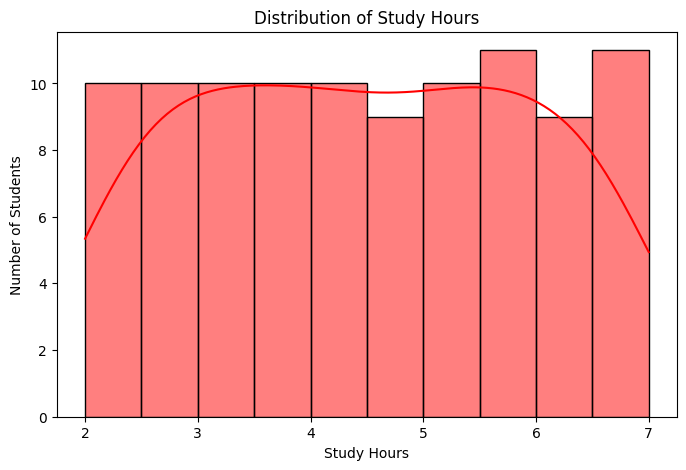

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['study_hours'], bins=10, kde=True, color='red')
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Number of Students")
plt.show()

In [17]:
# Create average marks column
df['avg_marks'] = df[['math_marks','science_marks','english_marks']].mean(axis=1)



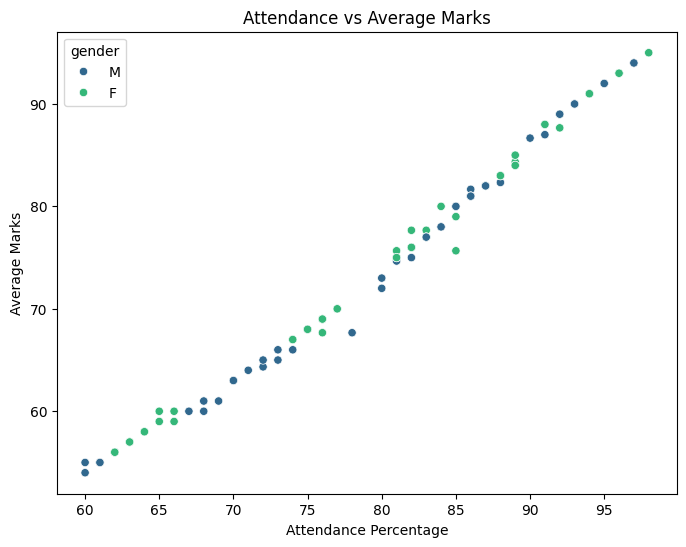

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='attendance_percentage', y='avg_marks', hue='gender', data=df, palette='viridis')
plt.title("Attendance vs Average Marks")
plt.xlabel("Attendance Percentage")
plt.ylabel("Average Marks")
plt.show()


<Figure size 800x600 with 0 Axes>

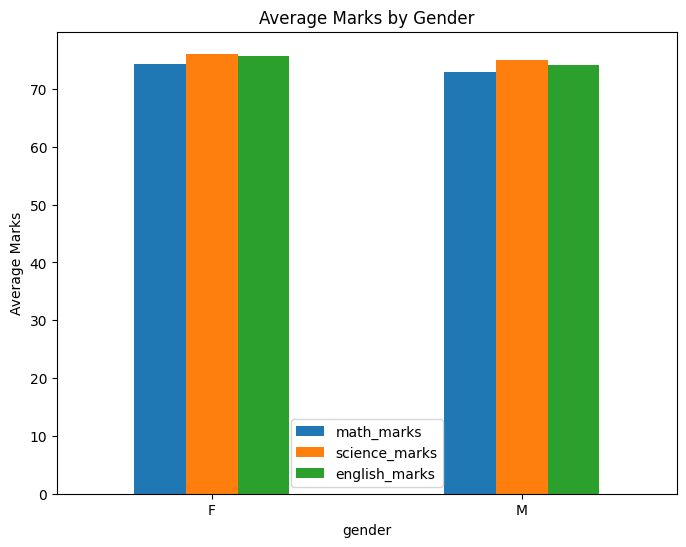

In [19]:
plt.figure(figsize=(8,6))
subject_means = df.groupby('gender')[['math_marks','science_marks','english_marks']].mean()
subject_means.plot(kind='bar', figsize=(8,6))
plt.title("Average Marks by Gender")
plt.ylabel("Average Marks")
plt.xticks(rotation=0)
plt.show()

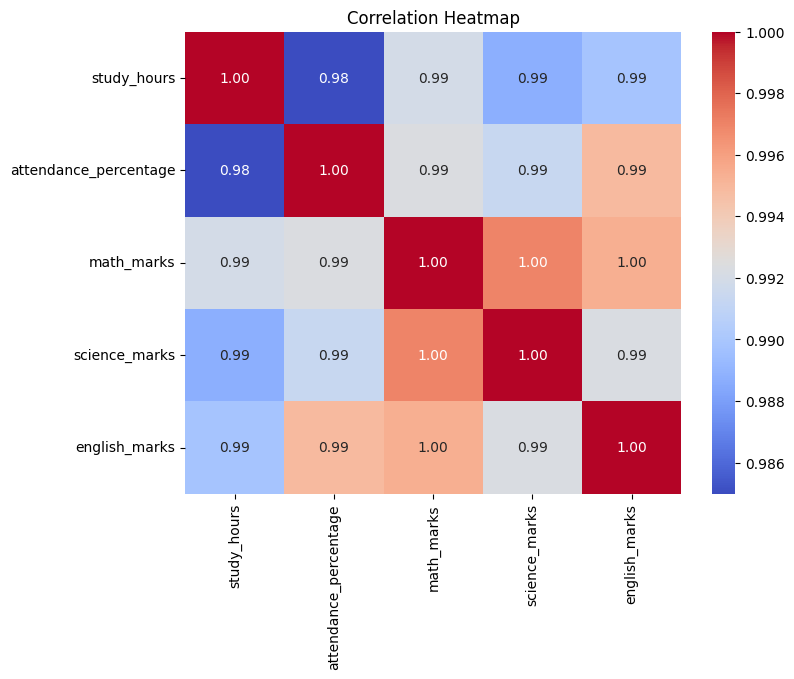

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['study_hours','attendance_percentage','math_marks','science_marks','english_marks']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Insight:
- Study hours and attendance both correlate positively with marks.
- Math and Science marks are strongly correlated, suggesting overlapping skill sets.

 Final Written Insights
- Students with higher attendance consistently achieve better average marks.
- Study hours positively impact performance, but diminishing returns appear after ~8 hours.
- Gender differences are minimal, though subject-specific strengths exist.
- Math and Science performance are closely linked, while English shows more independence.
